In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeanmidev/smart-meters-in-london")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\XzfhX\.cache\kagglehub\datasets\jeanmidev\smart-meters-in-london\versions\21


In [2]:
import os

# Specify the folder path
folder_path = path  # Replace this with the actual folder path

# List all files and directories in the specified folder
try:
    contents = os.listdir(folder_path)

    print(f"Contents of the folder '{folder_path}':")
    for item in contents:
        print(item)

except FileNotFoundError:
    print(f"The folder '{folder_path}' does not exist.")
except PermissionError:
    print(f"You do not have permission to access the folder '{folder_path}'.")

Contents of the folder 'C:\Users\XzfhX\.cache\kagglehub\datasets\jeanmidev\smart-meters-in-london\versions\21':
acorn_details.csv
daily_dataset
daily_dataset.csv
darksky_parameters_documentation.html
halfhourly_dataset
hhblock_dataset
informations_households.csv
uk_bank_holidays.csv
weather_daily_darksky.csv
weather_hourly_darksky.csv


C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3137047056.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ethnicity_data = df[df['MAIN CATEGORIES'] == 'POPULATION'][df['CATEGORIES'] == 'Ethnicity']
C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3137047056.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  religion_data = df[df['MAIN CATEGORIES'] == 'POPULATION'][df['CATEGORIES'] == 'Religion']



Ethnicity Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D    ACORN-E  \
count         5.000000    5.000000    5.000000    5.000000    5.00000   
mean        108.800000   74.000000   53.400000  190.400000  136.80000   
std          45.096563   26.448062   34.180404   95.101525   31.31613   
min          48.000000   34.000000   21.000000   83.000000   93.00000   
25%          98.000000   67.000000   34.000000  102.000000  116.00000   
50%         107.000000   79.000000   47.000000  215.000000  149.00000   
75%         117.000000   84.000000   55.000000  248.000000  158.00000   
max         174.000000  106.000000  110.000000  304.000000  168.00000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         5.000000    5.000000    5.000000    5.000000    5.000000   
mean         34.600000  113.200000   88.800000   43.200000   89.400000   
std          45.175214   56.636561    9.257429   40.058707   19.243181   
min           6

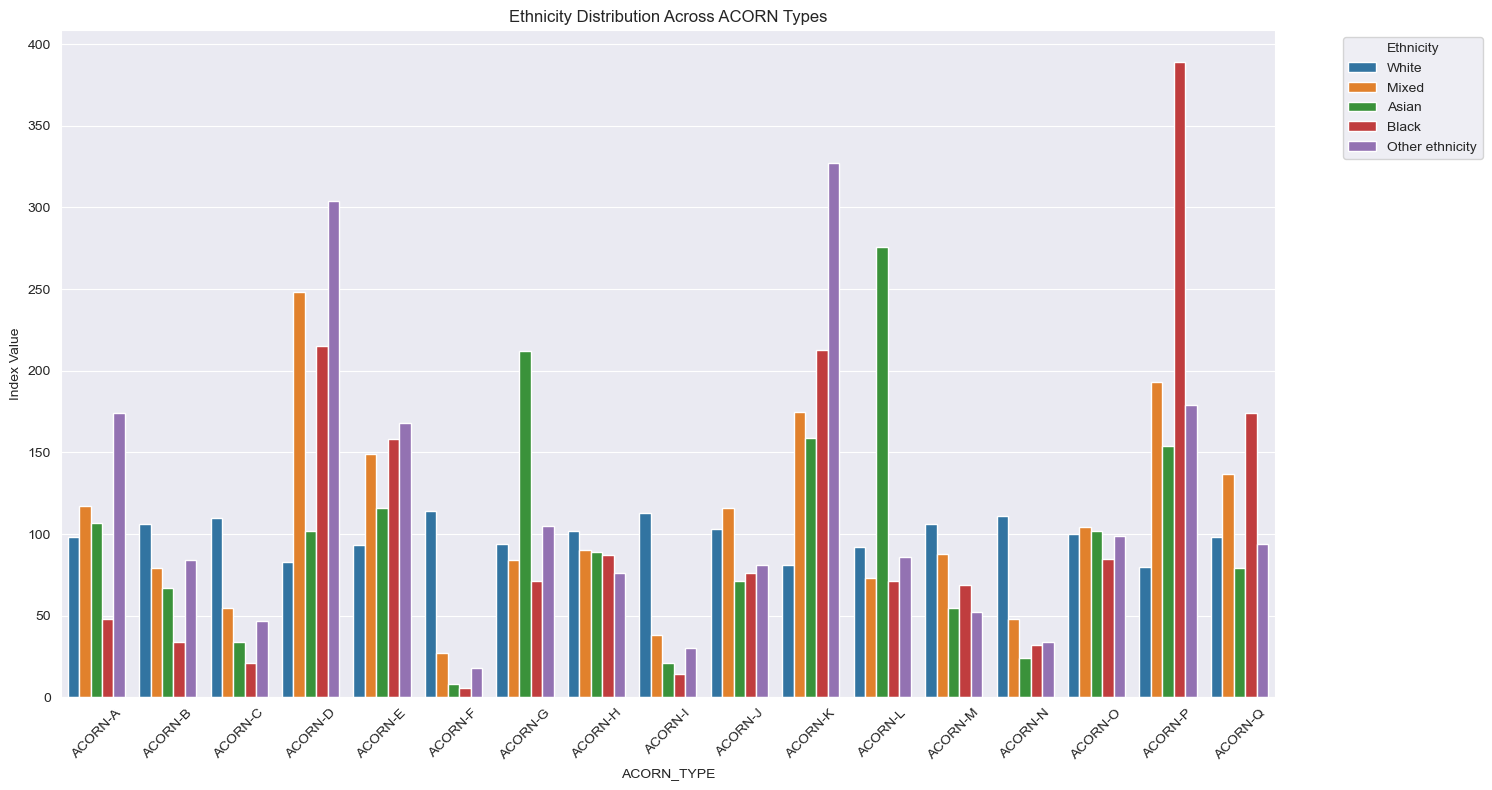

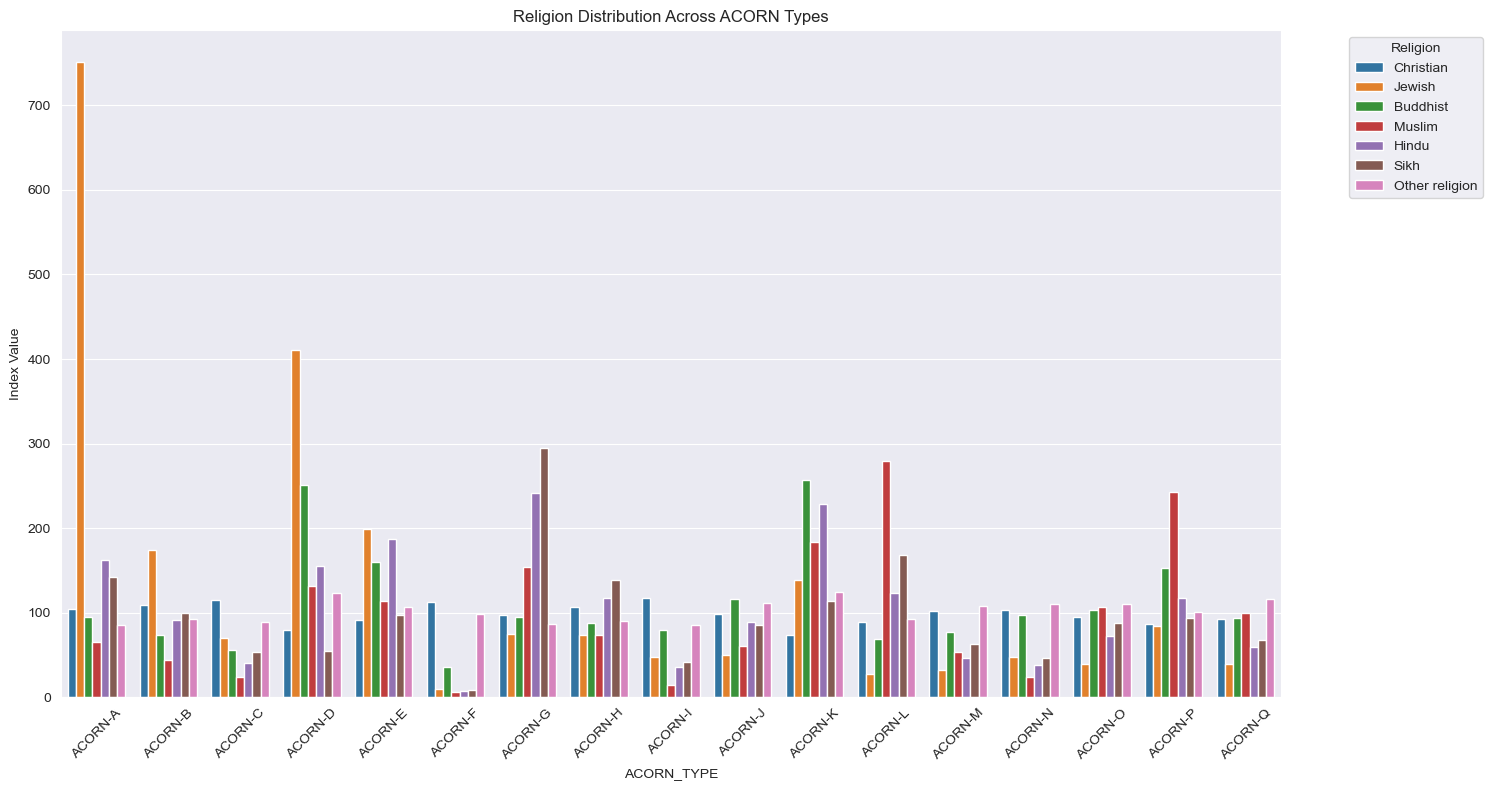

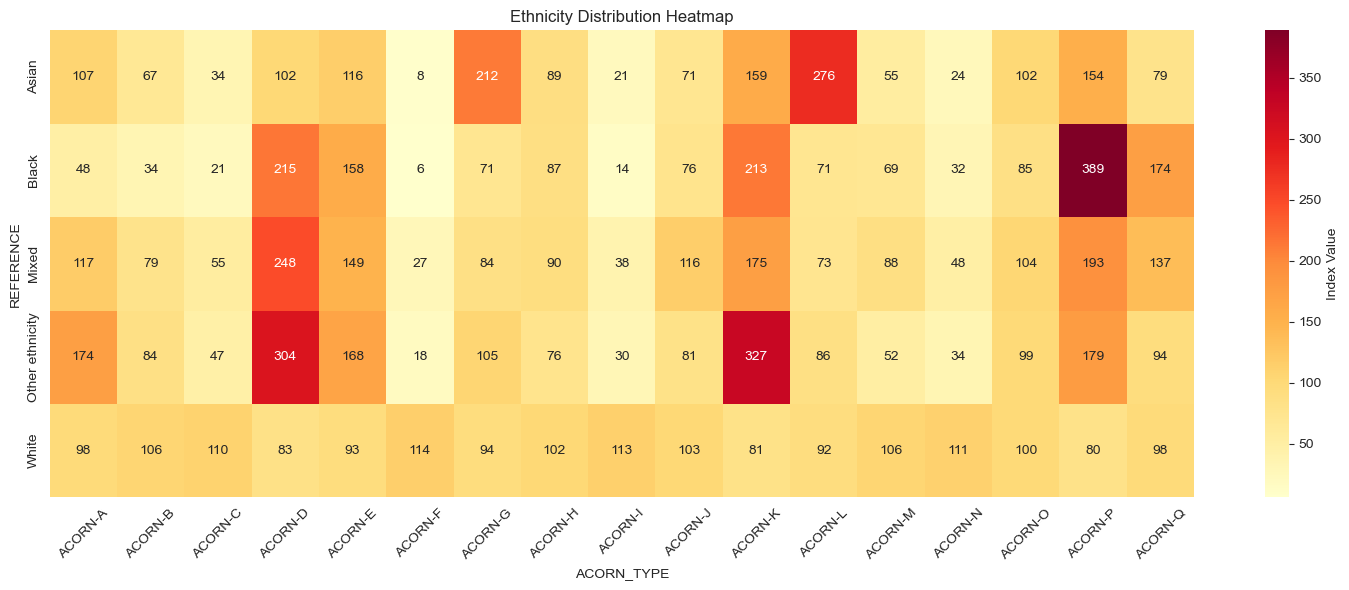

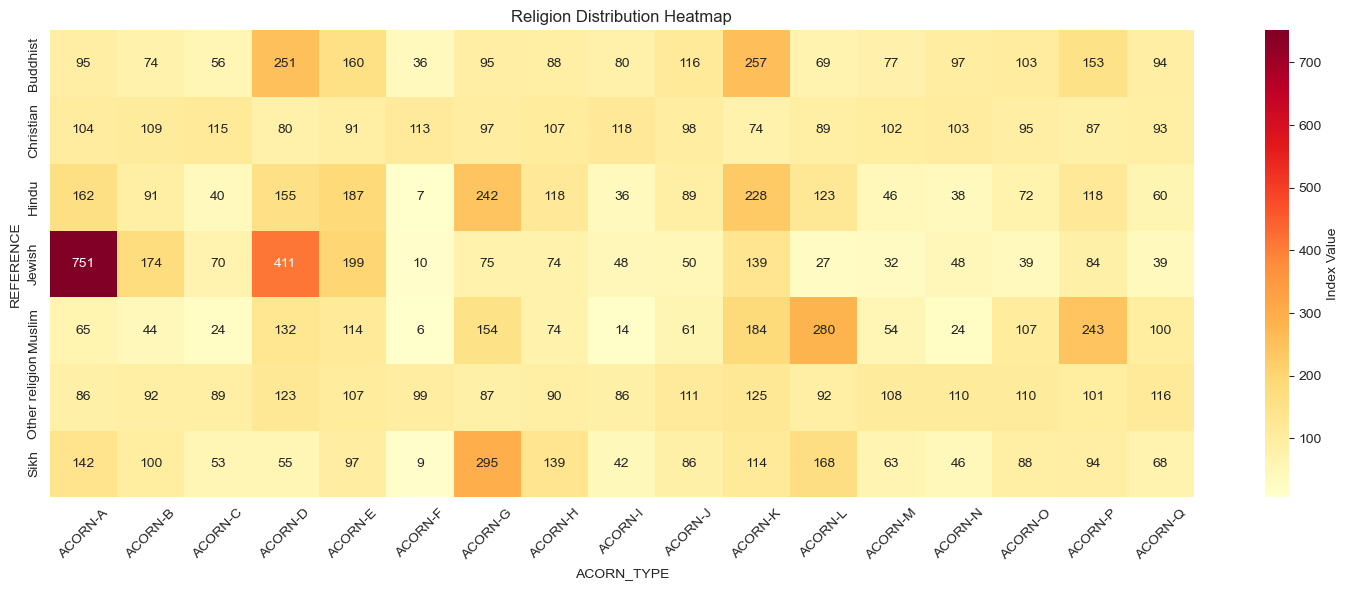

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_path= os.path.join(path, "acorn_details.csv")
df = pd.read_csv(df_path, encoding='cp1252')
# plotting  acorn based on religon and Ethincity.







# Filter for Ethnicity data
ethnicity_data = df[df['MAIN CATEGORIES'] == 'POPULATION'][df['CATEGORIES'] == 'Ethnicity']
ethnicity_data = ethnicity_data.melt(id_vars=['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE'],
                                   var_name='ACORN_TYPE',
                                   value_name='VALUE')

# Create figure for Ethnicity
plt.figure(figsize=(15, 8))
sns.barplot(data=ethnicity_data, x='ACORN_TYPE', y='VALUE', hue='REFERENCE')
plt.title('Ethnicity Distribution Across ACORN Types')
plt.xticks(rotation=45)
plt.ylabel('Index Value')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('ethnicity_distribution.png')


# Filter for Religion data
religion_data = df[df['MAIN CATEGORIES'] == 'POPULATION'][df['CATEGORIES'] == 'Religion']
religion_data = religion_data.melt(id_vars=['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE'],
                                 var_name='ACORN_TYPE',
                                 value_name='VALUE')

# Create figure for Religion
plt.figure(figsize=(15, 8))
sns.barplot(data=religion_data, x='ACORN_TYPE', y='VALUE', hue='REFERENCE')
plt.title('Religion Distribution Across ACORN Types')
plt.xticks(rotation=45)
plt.ylabel('Index Value')
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('religion_distribution.png')

# Create heatmaps
# Reshape data for heatmaps
ethnicity_pivot = ethnicity_data.pivot(index='REFERENCE', columns='ACORN_TYPE', values='VALUE')
religion_pivot = religion_data.pivot(index='REFERENCE', columns='ACORN_TYPE', values='VALUE')

# Ethnicity heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(ethnicity_pivot, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Index Value'})
plt.title('Ethnicity Distribution Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ethnicity_heatmap.png')


# Religion heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(religion_pivot, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Index Value'})
plt.title('Religion Distribution Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('religion_heatmap.png')


# Print summary statistics
print("\nEthnicity Summary Statistics:")
print(ethnicity_pivot.describe())
print("\nReligion Summary Statistics:")
print(religion_pivot.describe())






# ---------------------------------------------------------------------------------------------------------------------------------------------
# Above Analysis Result 
# we can see that the majority of households that lives a luxury lifestyle are jewish 
# also for the ethnicity, household who lives a difficult lifestyle are from the black ethnicity.

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3531557639.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == 'HOUSING'][df['CATEGORIES'] == category]



House Value Summary Statistics:
ACORN_TYPE      ACORN-A     ACORN-B     ACORN-C      ACORN-D     ACORN-E  \
count          7.000000    7.000000    7.000000     7.000000    7.000000   
mean         319.714286  140.714286  106.571429   215.000000  104.714286   
std          656.771831  115.956478   68.687352   350.789586   45.584041   
min           13.000000   17.000000   16.000000    38.000000   40.000000   
25%           38.500000   49.000000   51.000000    39.500000   84.000000   
50%           76.000000  124.000000  117.000000    89.000000   94.000000   
75%          133.500000  214.500000  155.000000   148.500000  123.500000   
max         1805.000000  317.000000  201.000000  1002.000000  184.000000   

ACORN_TYPE    ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         7.00000    7.000000    7.000000    7.000000    7.000000   
mean         77.00000   80.571429   82.142857   84.142857   77.714286   
std          42.21769   42.610082   44.476318   51.463348   56.

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3531557639.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == 'HOUSING'][df['CATEGORIES'] == category]



House Size Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         5.000000    5.000000    5.000000    5.000000    5.000000   
mean        247.800000  159.800000  104.400000  134.400000  115.200000   
std         349.943853  164.331068   53.369467   61.280503   24.621129   
min          27.000000   23.000000   32.000000   60.000000   73.000000   
25%          29.000000   28.000000   72.000000  113.000000  115.000000   
50%          43.000000   71.000000  109.000000  114.000000  124.000000   
75%         302.000000  329.000000  149.000000  162.000000  131.000000   
max         838.000000  348.000000  160.000000  223.000000  133.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         5.000000    5.000000    5.000000    5.000000    5.000000   
mean        100.200000   99.400000   81.400000   84.000000   86.800000   
std          43.216895   49.535846   50.767115   36.966201   25.073891   
min  

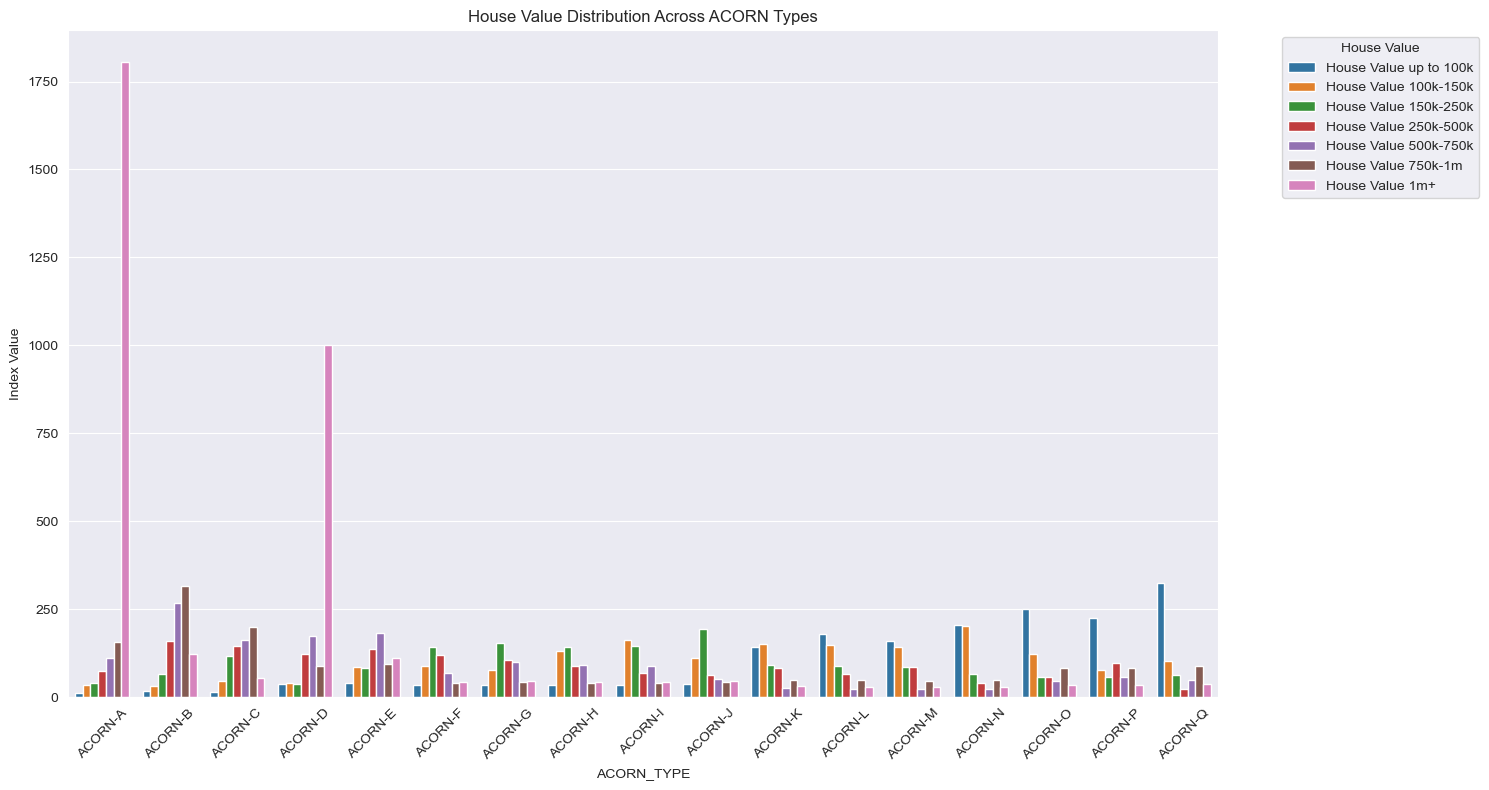

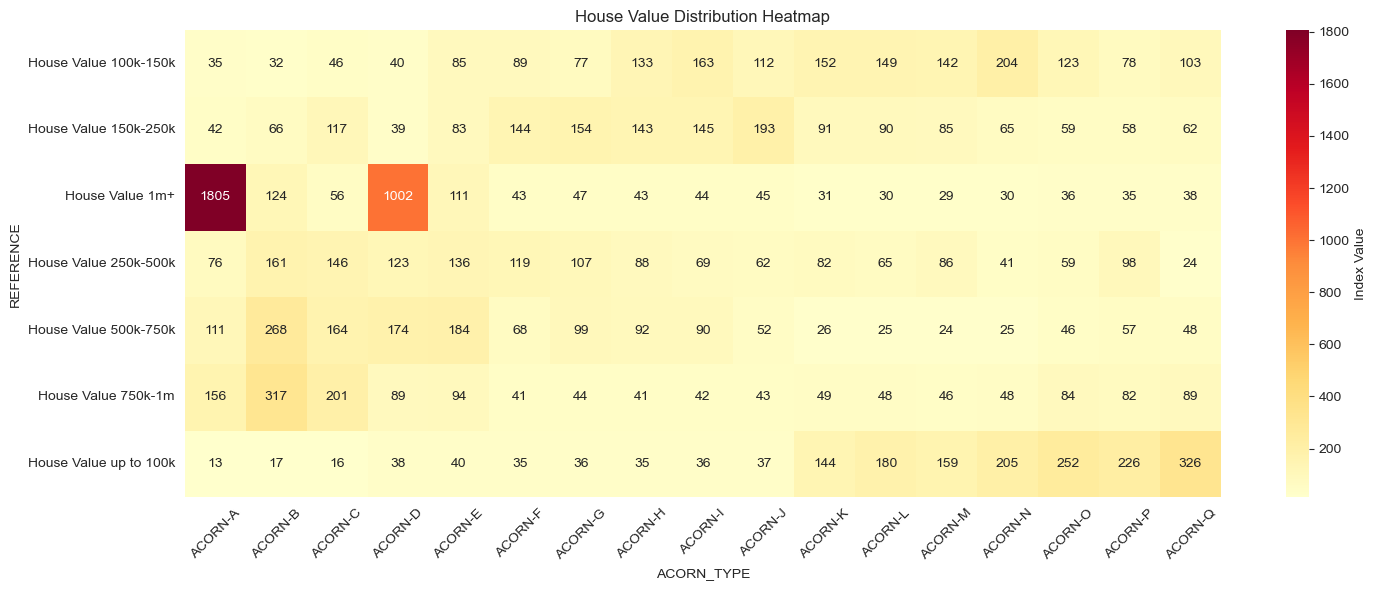

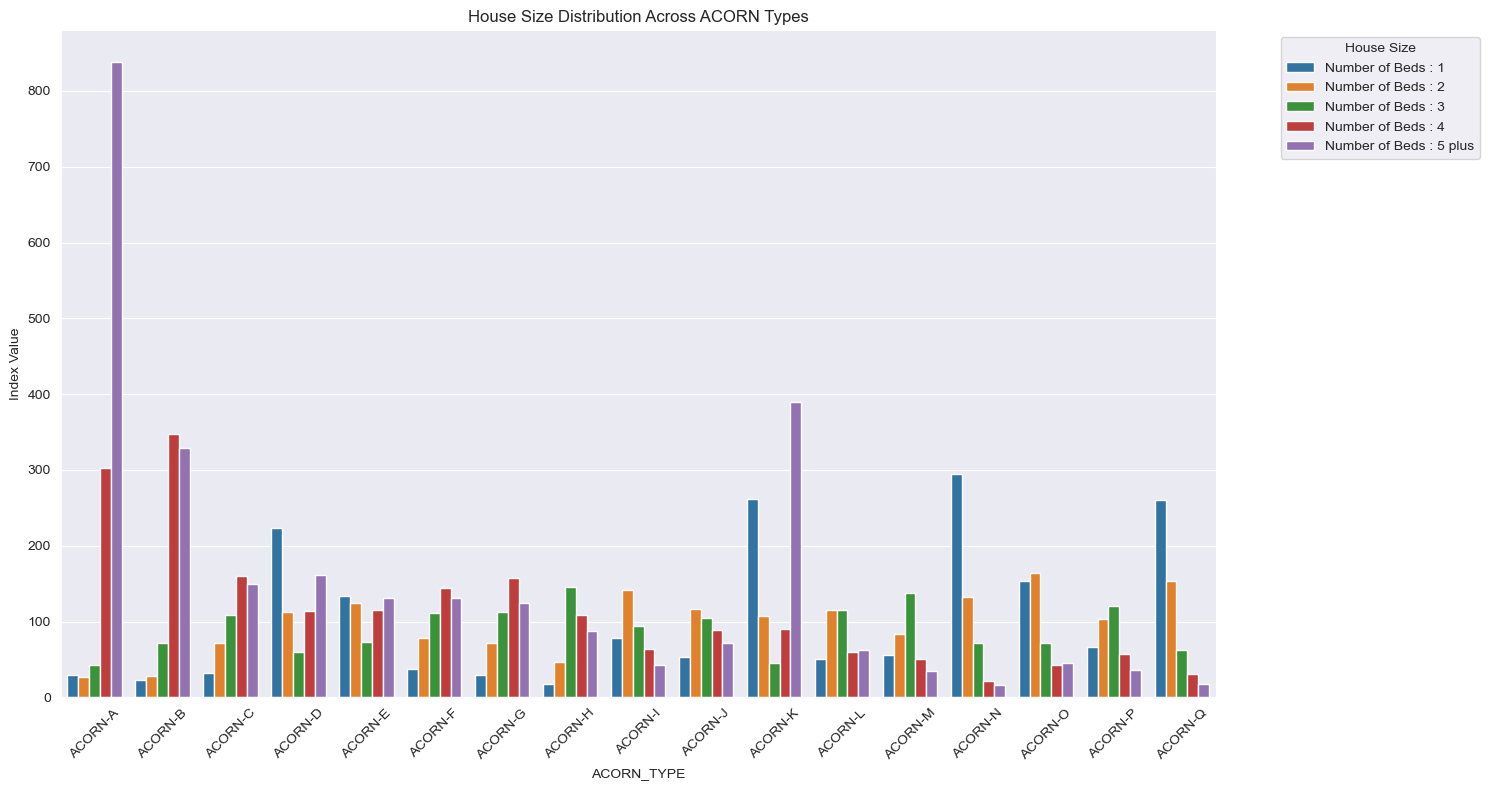

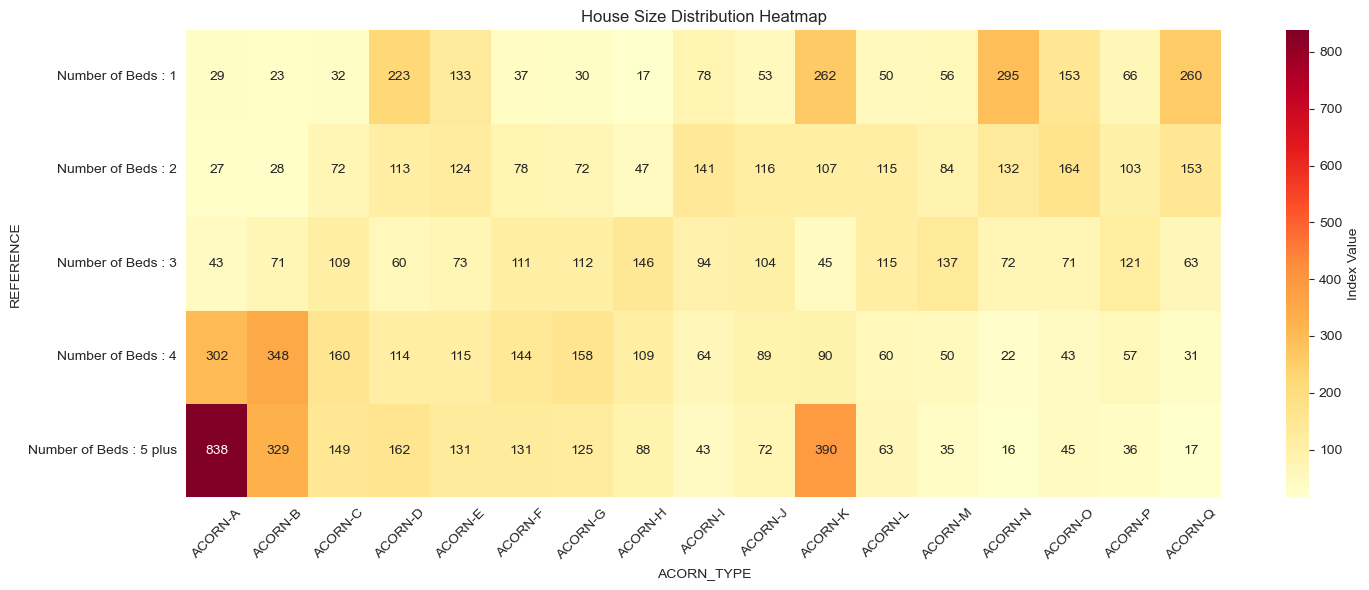

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# List of categories to analyze

# plotting acorn based on House value and size







categories_to_analyze = [
    'House Value',
    'House Size',
  
]







# Iterate through each category
for category in categories_to_analyze:
    # Filter data for the current category
    category_data = df[df['MAIN CATEGORIES'] == 'HOUSING'][df['CATEGORIES'] == category]

    # Check if the filtered data is empty
    if category_data.empty:
        print(f"No data found for category: {category}")
        continue

    # Melt the data for plotting
    category_data = category_data.melt(id_vars=['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE'],
                                        var_name='ACORN_TYPE',
                                        value_name='VALUE')

    # Create figure for the current category
    plt.figure(figsize=(15, 8))
    sns.barplot(data=category_data, x='ACORN_TYPE', y='VALUE', hue='REFERENCE')
    plt.title(f'{category} Distribution Across ACORN Types')
    plt.xticks(rotation=45)
    plt.ylabel('Index Value')
    plt.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{category.lower().replace(" ", "_")}_distribution.png')


    # Reshape data for heatmap
    category_pivot = category_data.pivot(index='REFERENCE', columns='ACORN_TYPE', values='VALUE')

    # Check if the pivot table is empty
    if category_pivot.empty:
        print(f"No data available to create a heatmap for category: {category}")
        continue

    # Heatmap for the current category
    plt.figure(figsize=(15, 6))
    sns.heatmap(category_pivot, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Index Value'})
    plt.title(f'{category} Distribution Heatmap')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{category.lower().replace(" ", "_")}_heatmap.png')


    # Print summary statistics for the current category
    print(f"\n{category} Summary Statistics:")
    print(category_pivot.describe())
 

   # --------------------------------------------------------------------------------------------------
   # Above Analysis Result
   # we can see that Acorn D (households that are not living a luxury lifestyle) tries to live the same luxury by having
   # houses with over 1 Million value

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Children in household Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         4.000000    4.000000    4.000000    4.000000    4.000000   
mean         90.250000   95.750000   82.750000   85.750000   98.250000   
std          17.745892   18.006943   23.471614   18.661458   18.463929   
min          68.000000   76.000000   55.000000   63.000000   75.000000   
25%          80.000000   85.000000   70.750000   77.250000   91.500000   
50%          93.500000   94.500000   82.500000   86.000000   99.000000   
75%         103.750000  105.250000   94.500000   94.500000  105.750000   
max         106.000000  118.000000  111.000000  108.000000  120.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H    ACORN-I     ACORN-J  \
count         4.000000    4.000000    4.000000    4.00000    4.000000   
mean         87.250000   97.000000  101.250000   67.75000   97.000000   
std          16.859715    9.128709    7.719024   38.17831   11.165423  

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Economic Activity Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C    ACORN-D     ACORN-E  \
count         8.000000    8.000000    8.000000    8.00000    8.000000   
mean         98.875000   88.875000   89.125000   92.50000   89.750000   
std          43.343932   28.915826   36.037431   37.95486   23.180965   
min          29.000000   42.000000   46.000000   40.00000   49.000000   
25%          79.750000   75.000000   64.500000   70.00000   81.750000   
50%         101.500000   92.000000   82.000000   81.50000   85.000000   
75%         116.750000  106.250000  107.250000  129.25000  101.500000   
max         169.000000  132.000000  154.000000  144.00000  128.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         8.000000    8.000000    8.000000    8.000000    8.000000   
mean         91.625000   92.625000   90.875000   90.375000   89.375000   
std          38.994276   14.272226   15.037453   63.823277   17.999504   
min    

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Social Grade Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C    ACORN-D     ACORN-E  \
count         6.000000    6.000000    6.000000    6.00000    6.000000   
mean        161.166667  123.333333  107.000000  114.00000  101.666667   
std         218.657190  112.897594   59.015252   86.72024   45.054042   
min          26.000000   30.000000   47.000000   42.00000   44.000000   
25%          30.250000   37.750000   56.750000   43.00000   70.500000   
50%          60.500000   81.500000   98.000000   81.50000   98.500000   
75%         176.250000  180.000000  149.750000  178.50000  138.500000   
max         585.000000  311.000000  189.000000  238.00000  156.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         6.000000    6.000000    6.000000    6.000000    6.000000   
mean         99.666667   98.666667   95.166667   98.166667   95.166667   
std          29.118150   34.162357   24.701552   13.257702   29.342233   
min         

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Highest Level of Qualifications (Adults) Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         6.000000    6.000000    6.000000    6.000000    6.000000   
mean         88.666667  100.166667  103.166667   80.500000   96.166667   
std          53.794671   28.944199   17.279082   69.125249   28.840365   
min          49.000000   59.000000   84.000000   28.000000   66.000000   
25%          56.500000   88.750000   90.500000   44.750000   77.500000   
50%          72.500000  103.000000  100.000000   55.500000   90.000000   
75%          88.500000  104.500000  114.750000   79.000000  106.250000   
max         193.000000  147.000000  128.000000  216.000000  146.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         6.000000    6.000000    6.000000    6.000000    6.000000   
mean        104.666667  102.833333  107.333333  103.833333  102.000000   
std          12.516656    7.730890   15.794514   

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Behaviours & Lifestyle Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         7.000000    7.000000    7.000000    7.000000    7.000000   
mean         88.571429   84.571429   86.714286   93.714286   95.714286   
std          47.542462   32.984123   25.753409   33.806874   23.872678   
min          29.000000   41.000000   52.000000   42.000000   61.000000   
25%          48.000000   58.000000   67.500000   71.500000   78.500000   
50%          91.000000   91.000000   91.000000  100.000000  100.000000   
75%         132.000000  110.000000  105.000000  118.500000  112.500000   
max         140.000000  124.000000  119.000000  134.000000  127.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         7.000000    7.000000    7.000000    7.000000    7.000000   
mean         88.428571   95.714286   97.428571   87.571429  101.285714   
std          14.175767    8.240435    7.230886   14.351041    8.280

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Travel To Work Summary Statistics:
ACORN_TYPE     ACORN-A    ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         8.000000    8.00000    8.000000    8.000000    8.000000   
mean        117.000000   85.87500   84.125000  171.875000  106.250000   
std          70.974845   38.70562   29.806219  137.359214   42.465953   
min          39.000000   40.00000   49.000000   32.000000   59.000000   
25%          73.500000   54.75000   60.500000  112.250000   90.250000   
50%          87.500000   85.50000   78.500000  125.000000   93.500000   
75%         161.500000  105.25000  105.000000  177.000000  105.750000   
max         230.000000  156.00000  133.000000  470.000000  202.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         8.000000    8.000000    8.000000    8.000000    8.000000   
mean         81.750000   84.875000   86.375000   93.625000   94.875000   
std          65.116928   12.182394   13.394428   24.436141   21.006377   
min       

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Household Annual Income Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count         7.000000    7.000000    7.000000    7.000000    7.000000   
mean        198.571429  165.285714  115.571429  148.714286  124.428571   
std         168.747205  103.342012   25.520300   76.023493   37.677832   
min          19.000000   30.000000   65.000000   43.000000   55.000000   
25%          80.500000   98.000000  109.000000  102.000000  110.500000   
50%         195.000000  163.000000  123.000000  148.000000  131.000000   
75%         252.000000  218.000000  132.500000  189.500000  152.000000   
max         511.000000  332.000000  138.000000  267.000000  160.000000   

ACORN_TYPE     ACORN-F     ACORN-G    ACORN-H     ACORN-I     ACORN-J  \
count         7.000000    7.000000    7.00000    7.000000    7.000000   
mean         99.714286  115.714286  103.00000   74.857143  103.714286   
std          17.413733   28.347335   19.42507   37.993107   22.020553

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Financial Situation Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B    ACORN-C     ACORN-D     ACORN-E  \
count         6.000000    6.000000    6.00000    6.000000    6.000000   
mean        110.166667  107.333333  104.00000  110.666667  103.666667   
std          47.067682   38.990597   22.25309   37.146557   17.084106   
min          58.000000   61.000000   75.00000   70.000000   82.000000   
25%          78.000000   78.750000   87.00000   85.750000   91.000000   
50%         110.500000  111.500000  110.50000  111.000000  108.000000   
75%         121.250000  121.000000  114.50000  117.500000  110.000000   
max         190.000000  168.000000  133.00000  175.000000  128.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count         6.000000    6.000000    6.000000    6.000000    6.000000   
mean        100.666667  101.666667   99.833333   99.166667  100.000000   
std          14.264174   14.023789    9.703951   10.609744   10.825895   
min  

C:\Users\XzfhX\AppData\Local\Temp\ipykernel_1848\3375600058.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]



Crime Survey for England Summary Statistics:
ACORN_TYPE     ACORN-A     ACORN-B     ACORN-C     ACORN-D     ACORN-E  \
count        22.000000   22.000000   22.000000   22.000000   22.000000   
mean         91.954545   88.454545   90.636364   94.272727   91.590909   
std          24.253576   22.197656   20.193222   19.066754   13.678830   
min          52.000000   50.000000   51.000000   57.000000   62.000000   
25%          75.000000   62.500000   72.750000   82.750000   80.500000   
50%          99.500000   99.000000  100.000000   94.000000   95.000000   
75%         103.750000  103.000000  104.000000  103.750000  102.750000   
max         163.000000  124.000000  119.000000  138.000000  110.000000   

ACORN_TYPE     ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count        22.000000   22.000000   22.000000   22.000000   22.000000   
mean         90.272727   99.909091  102.318182   96.727273   93.500000   
std          20.069360    4.699636    6.875674   15.802899   13.8

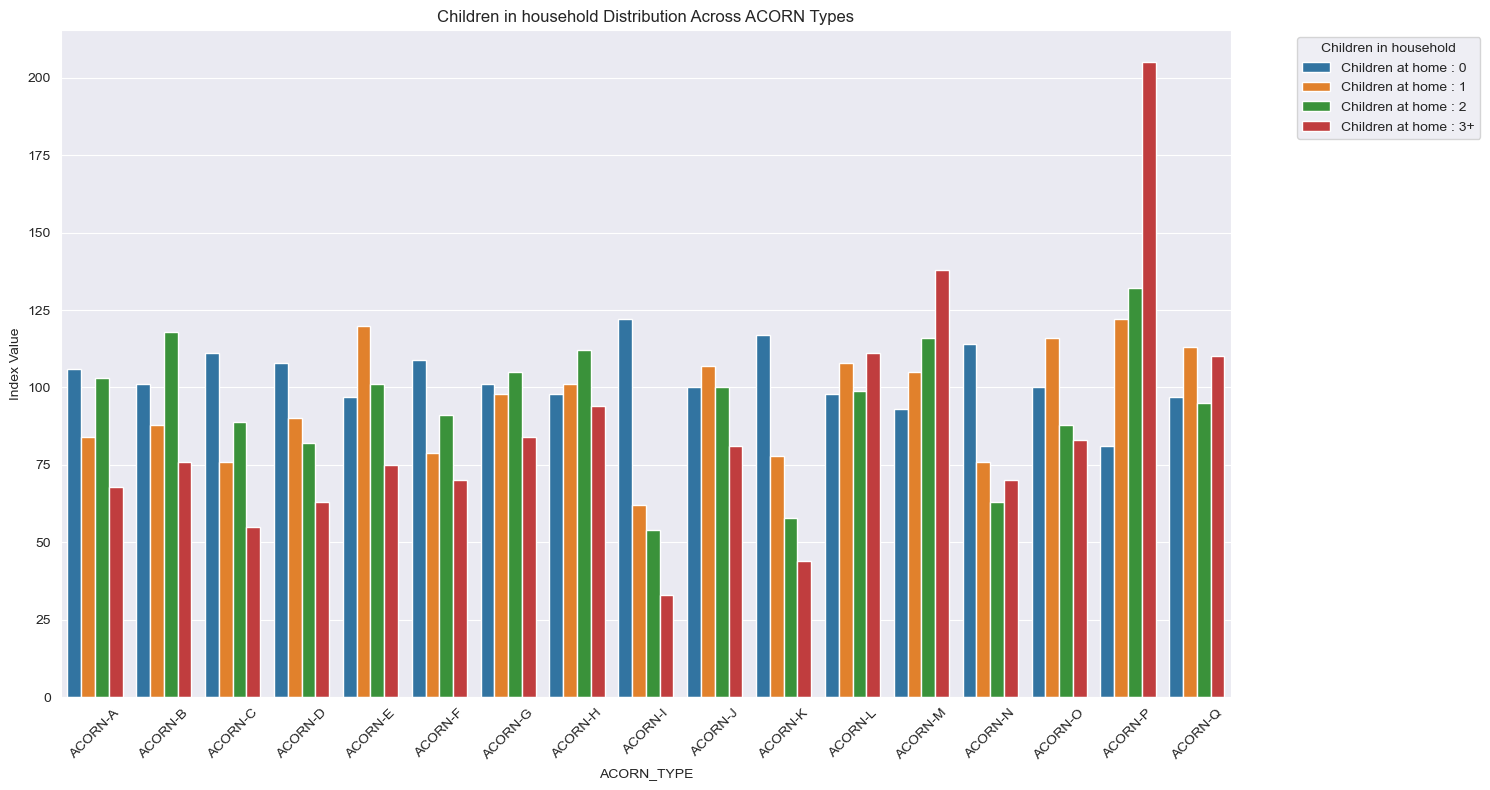

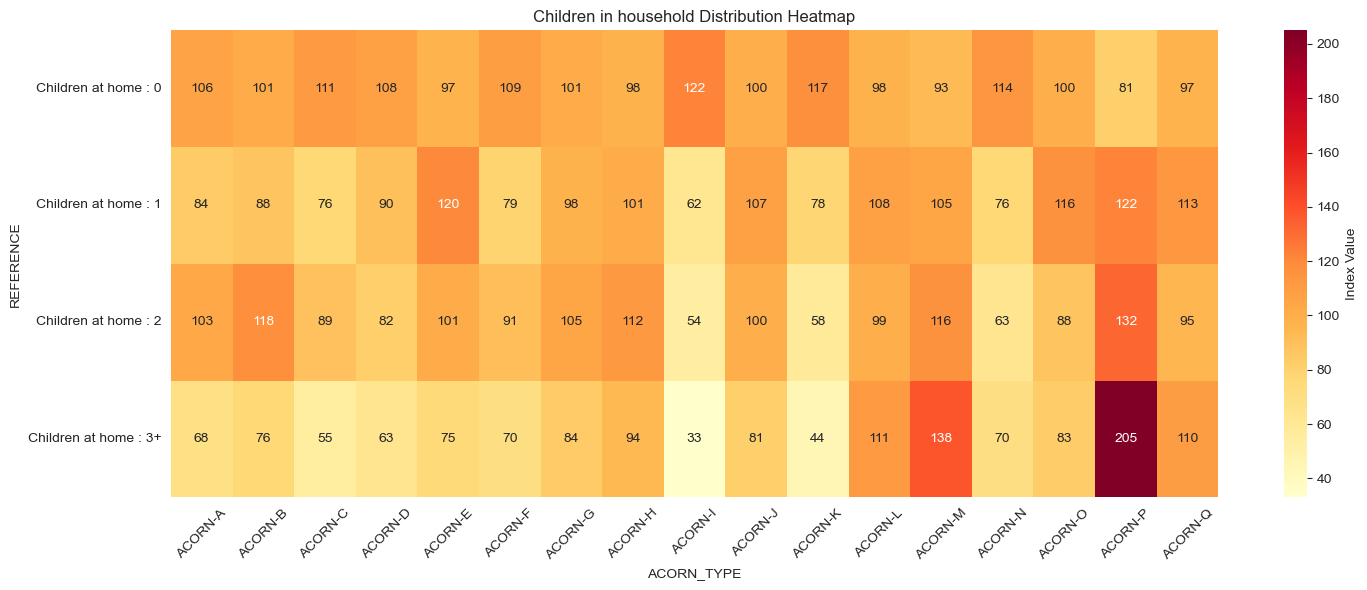

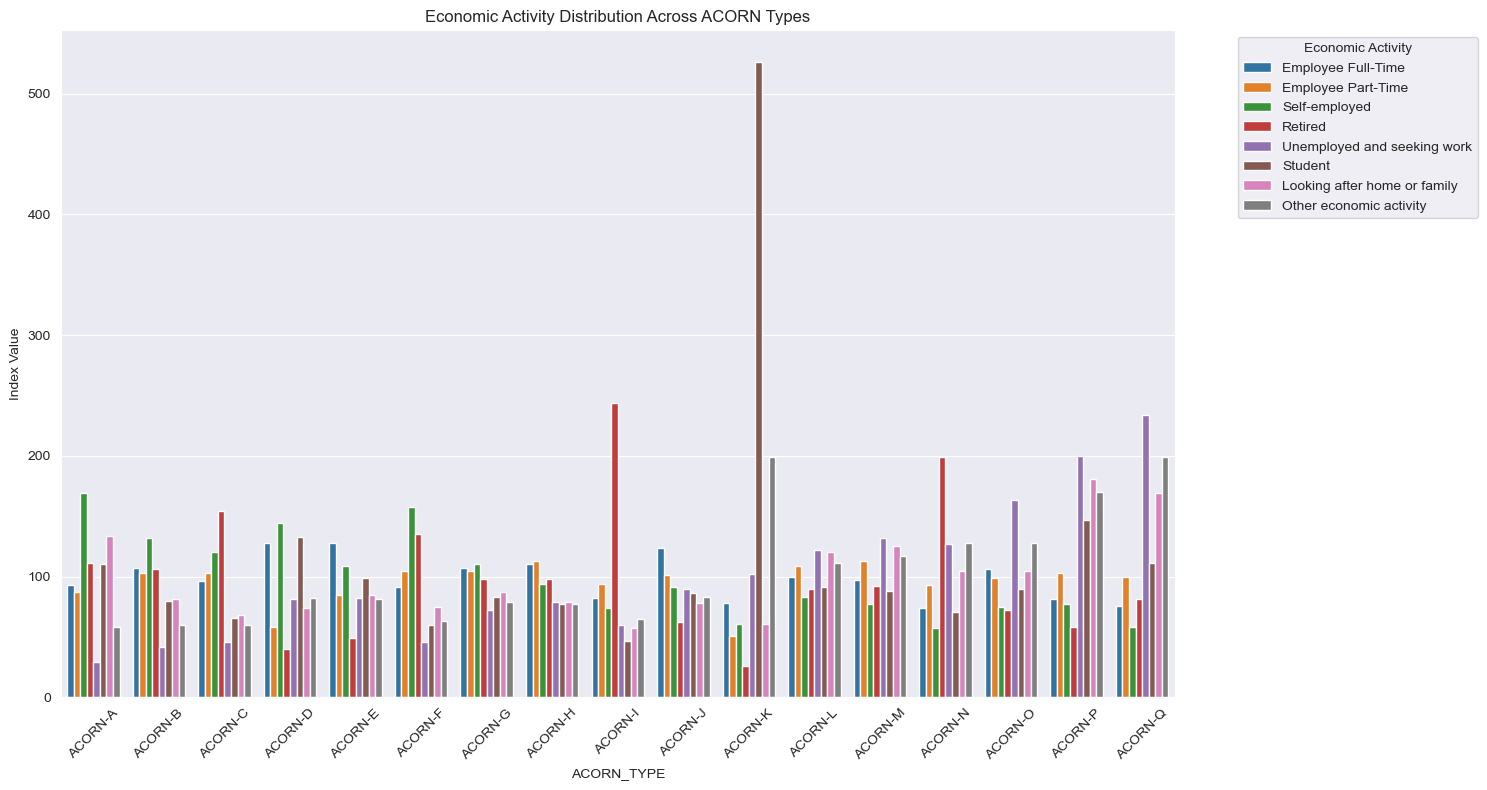

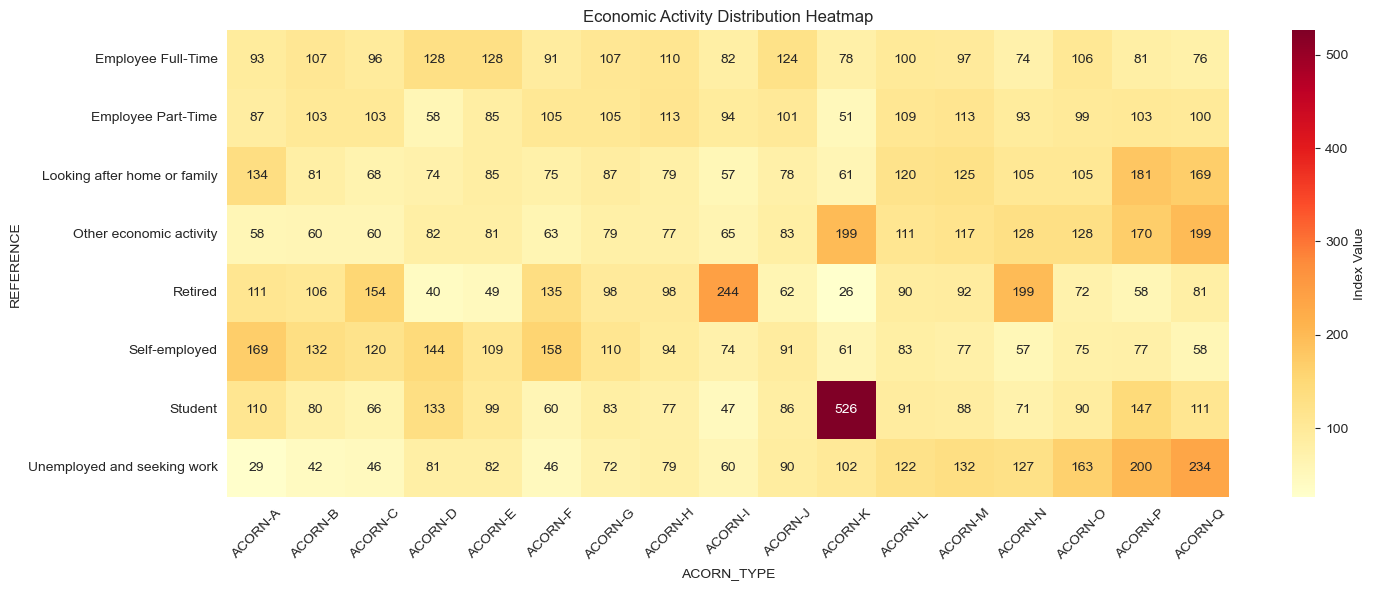

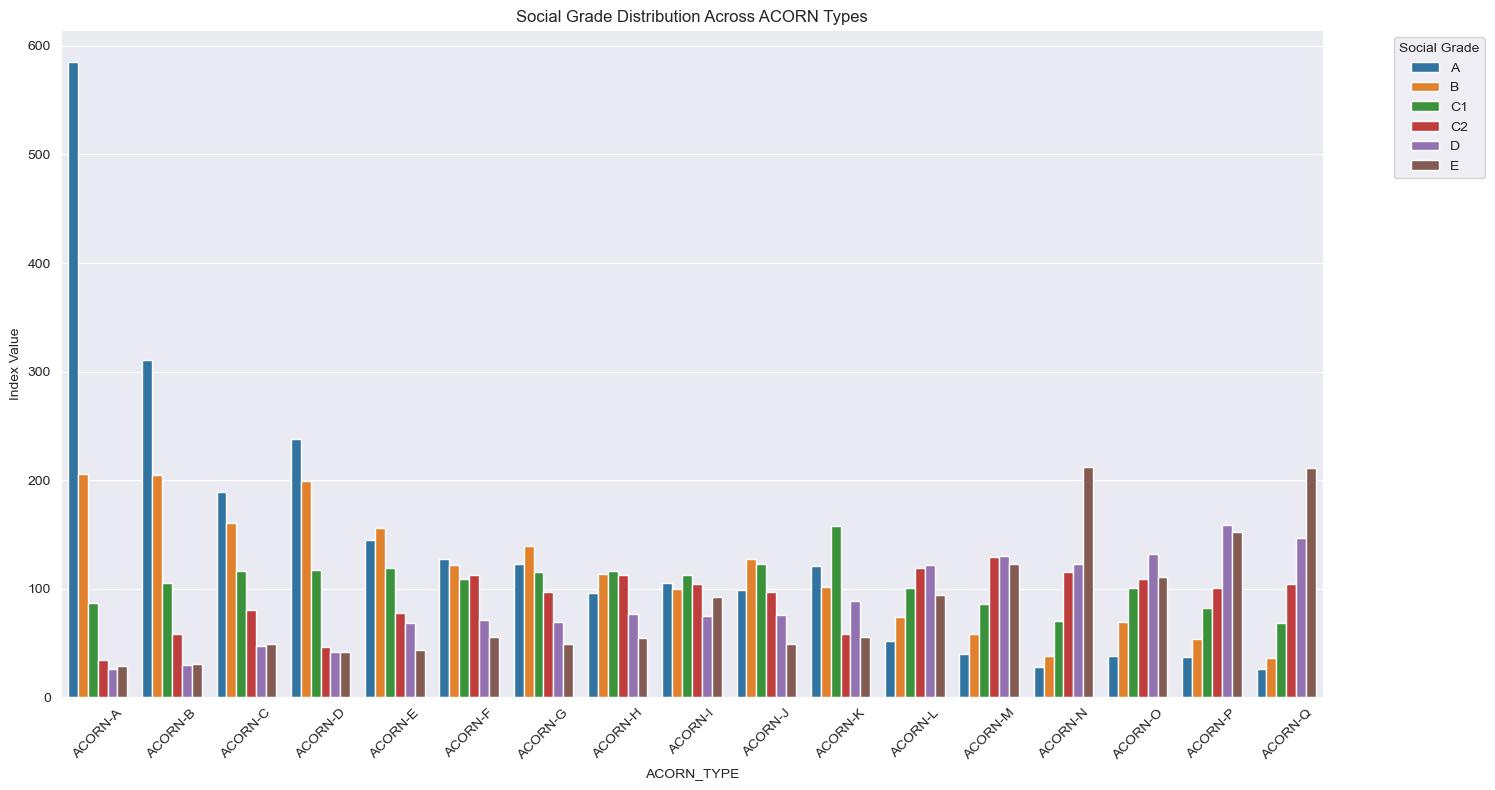

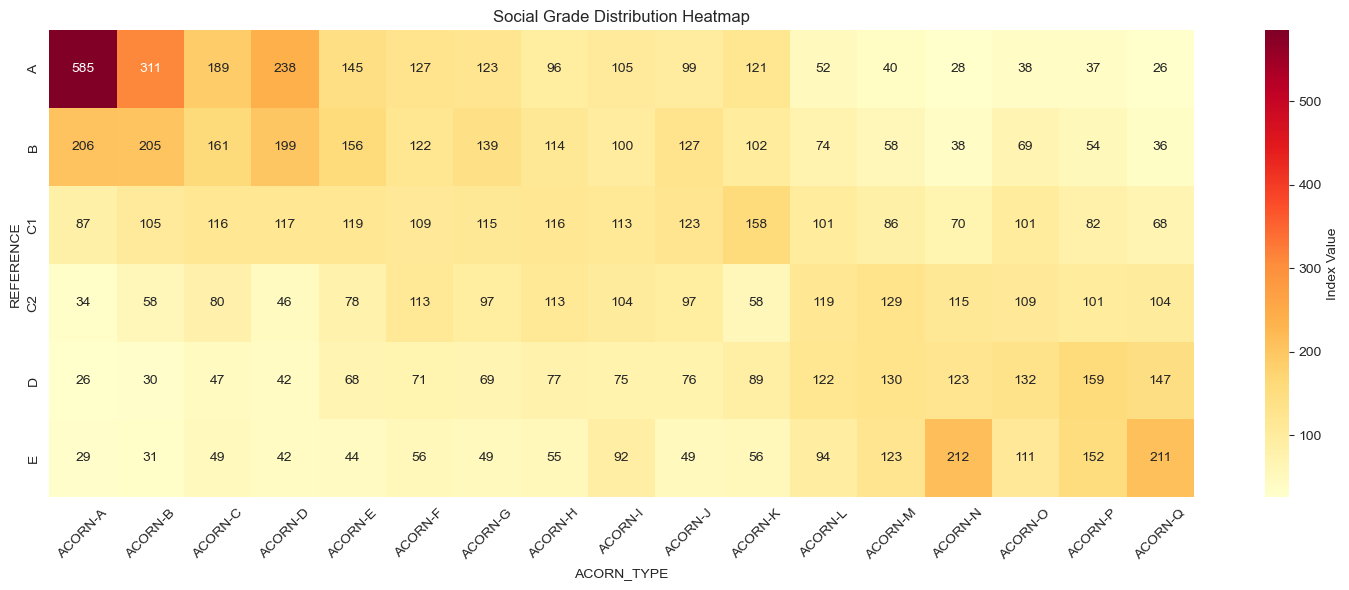

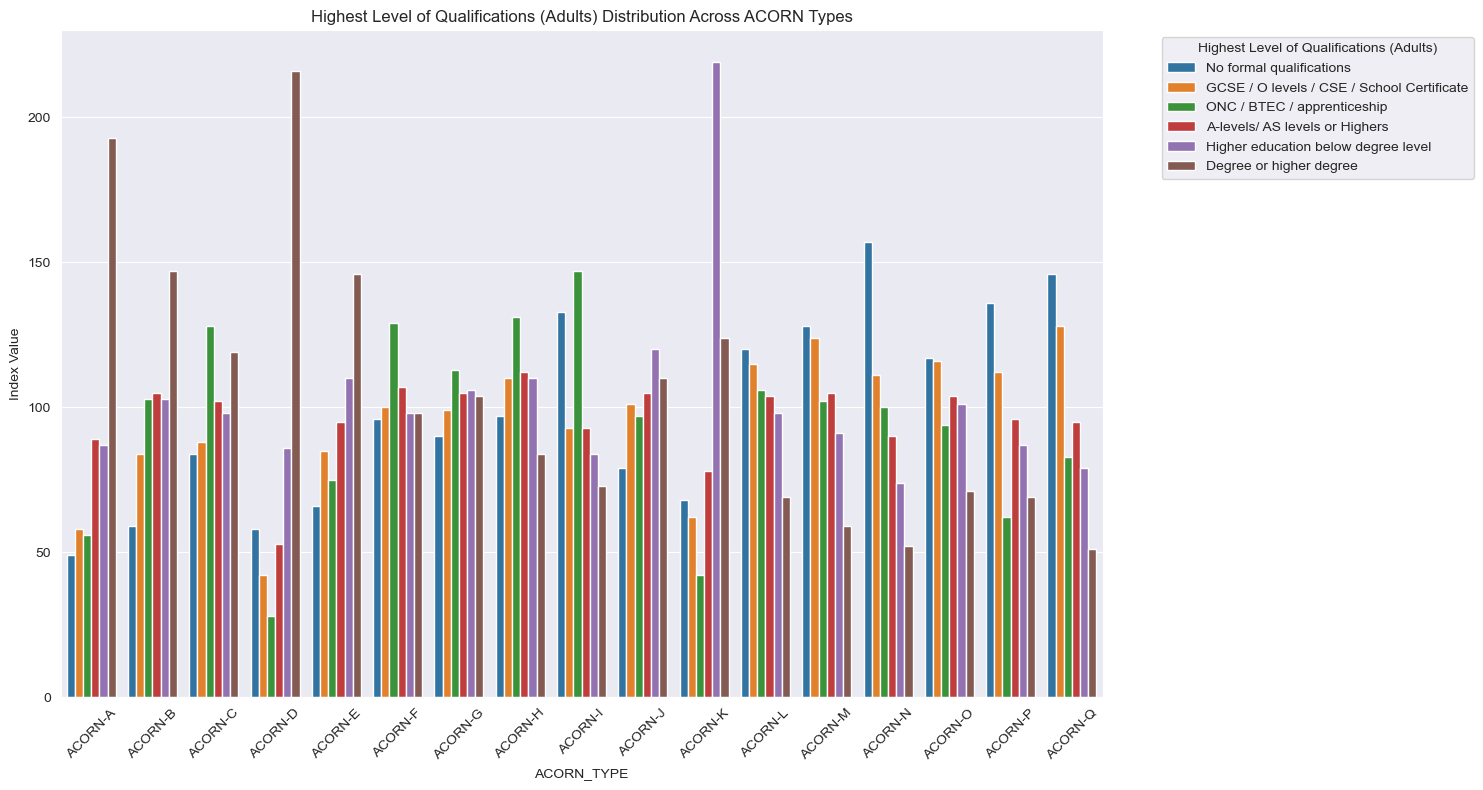

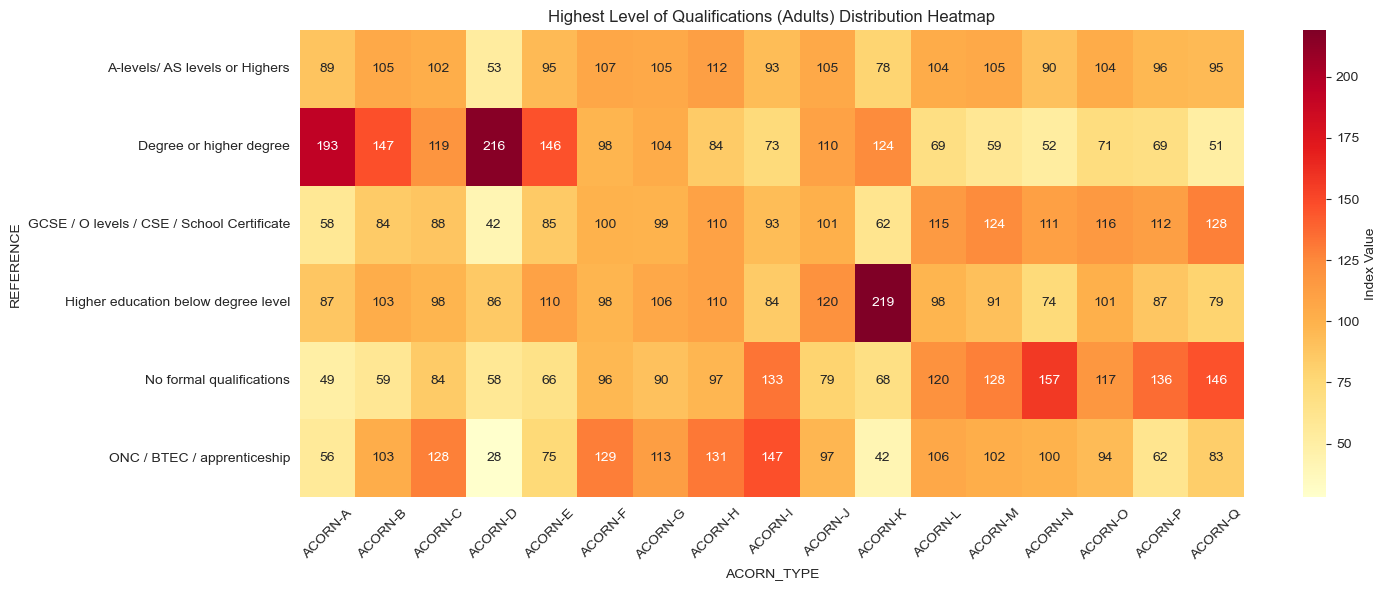

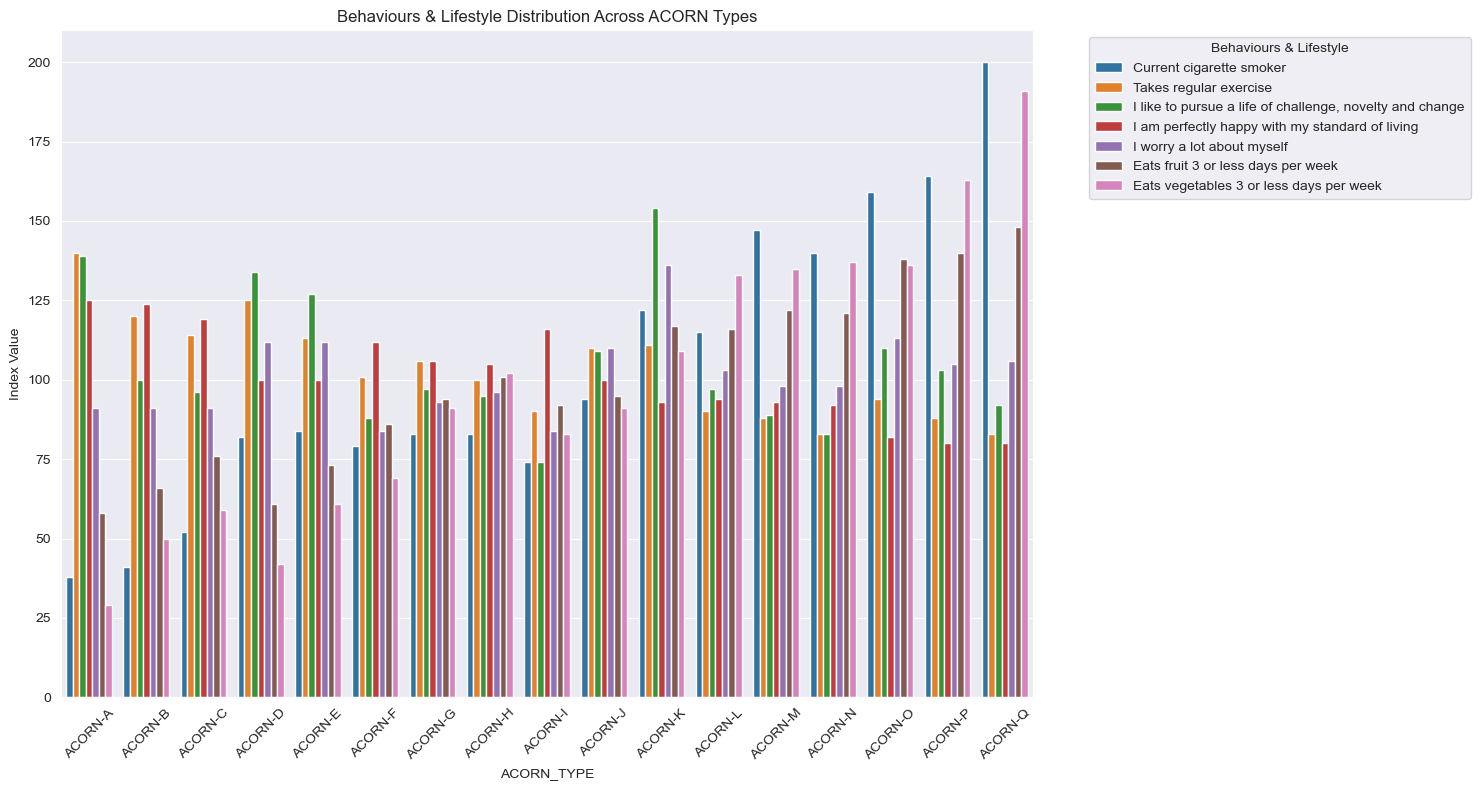

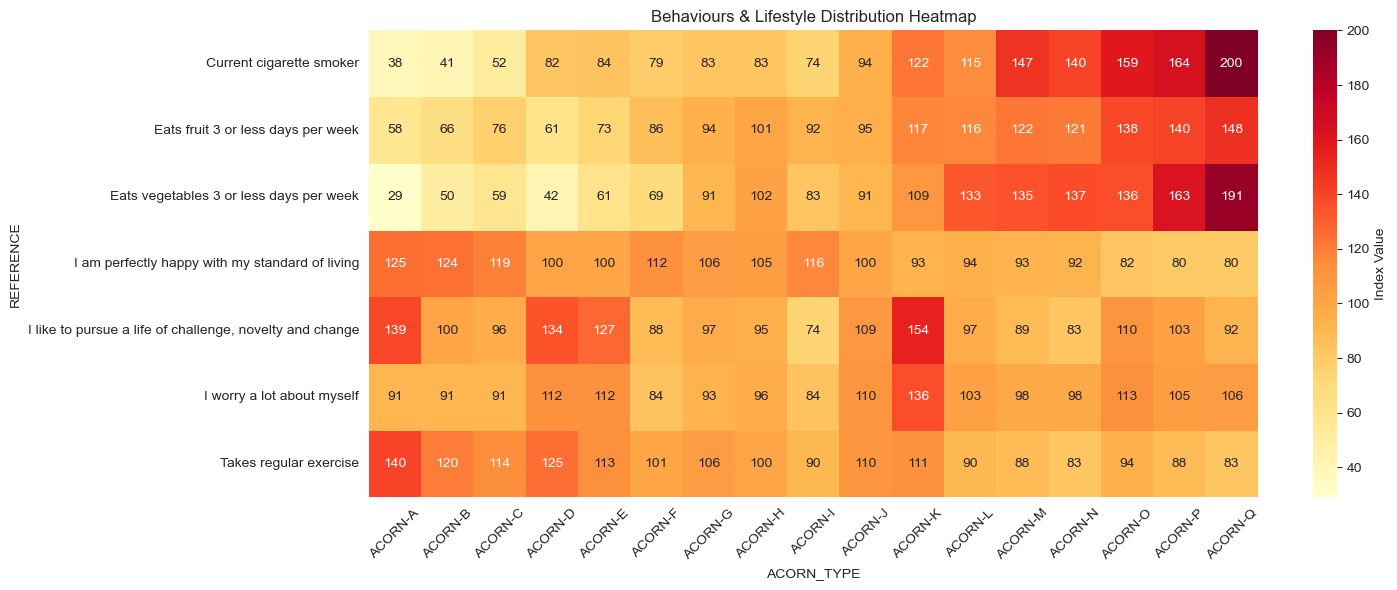

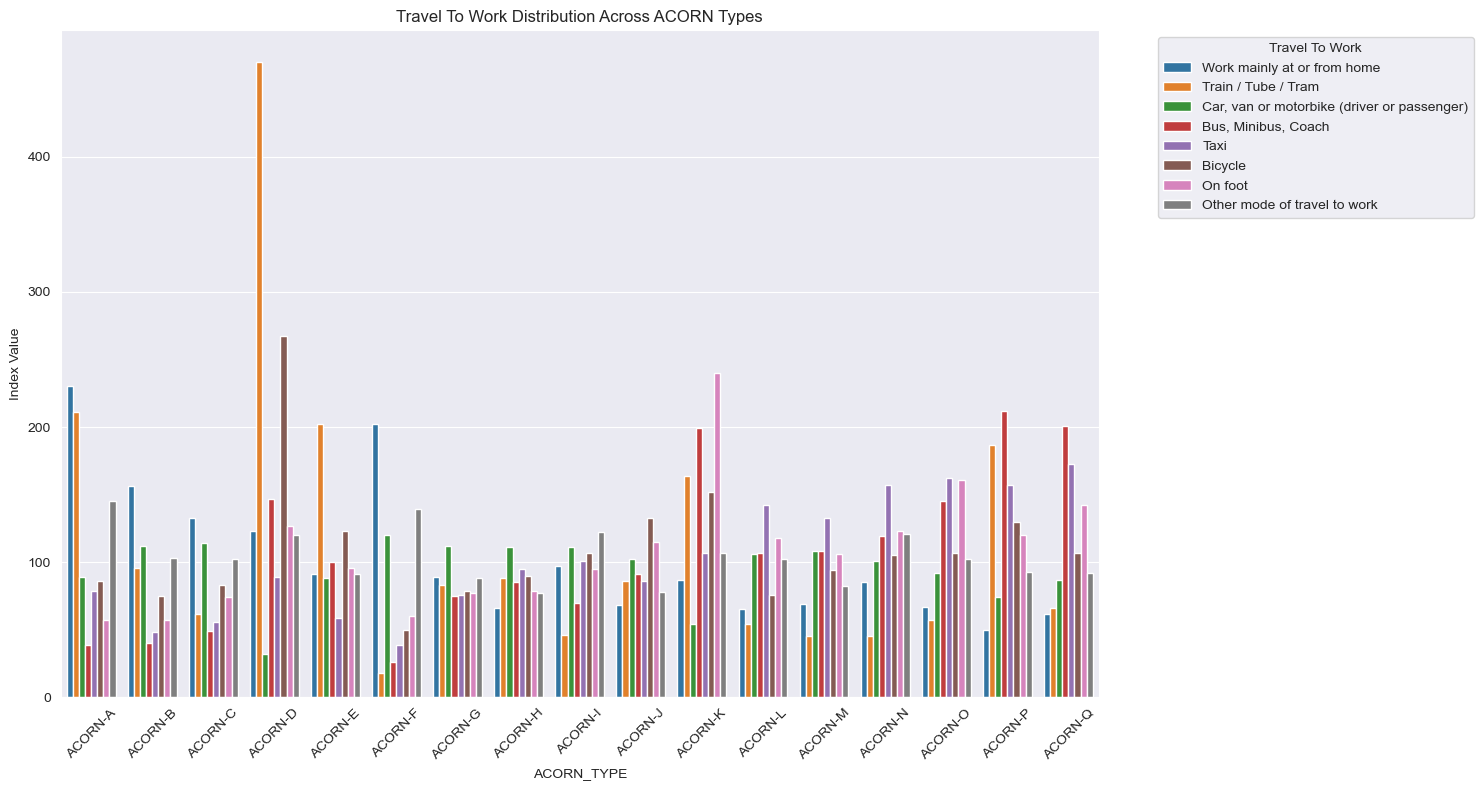

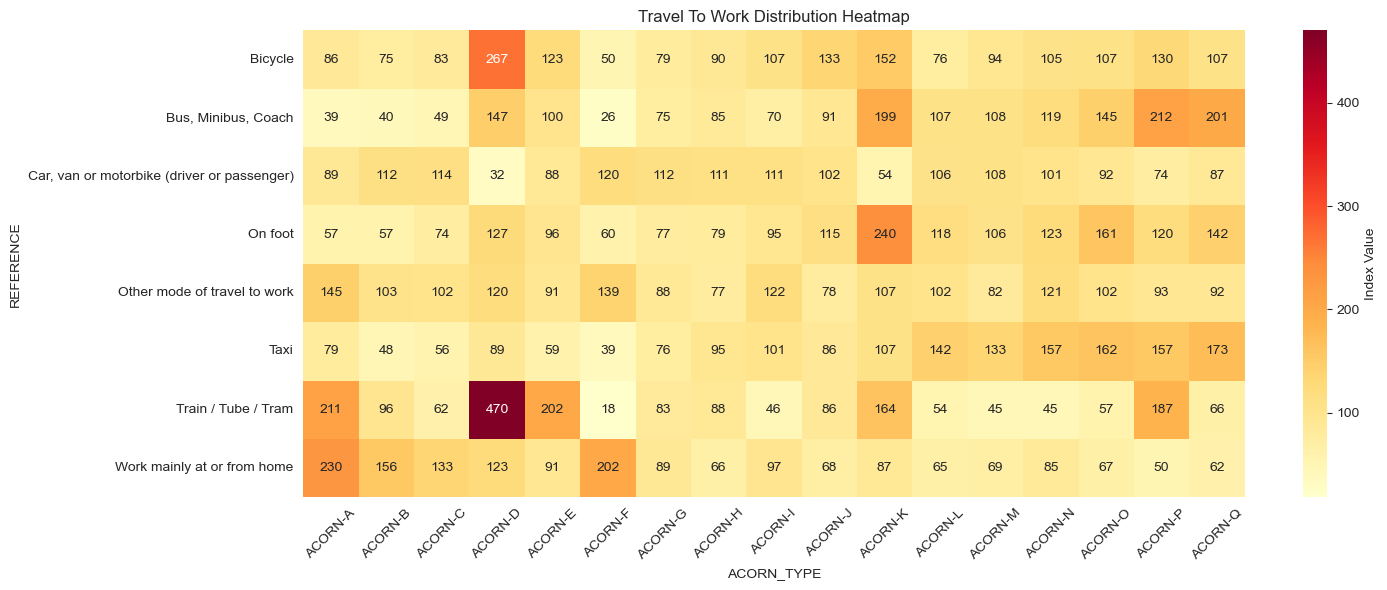

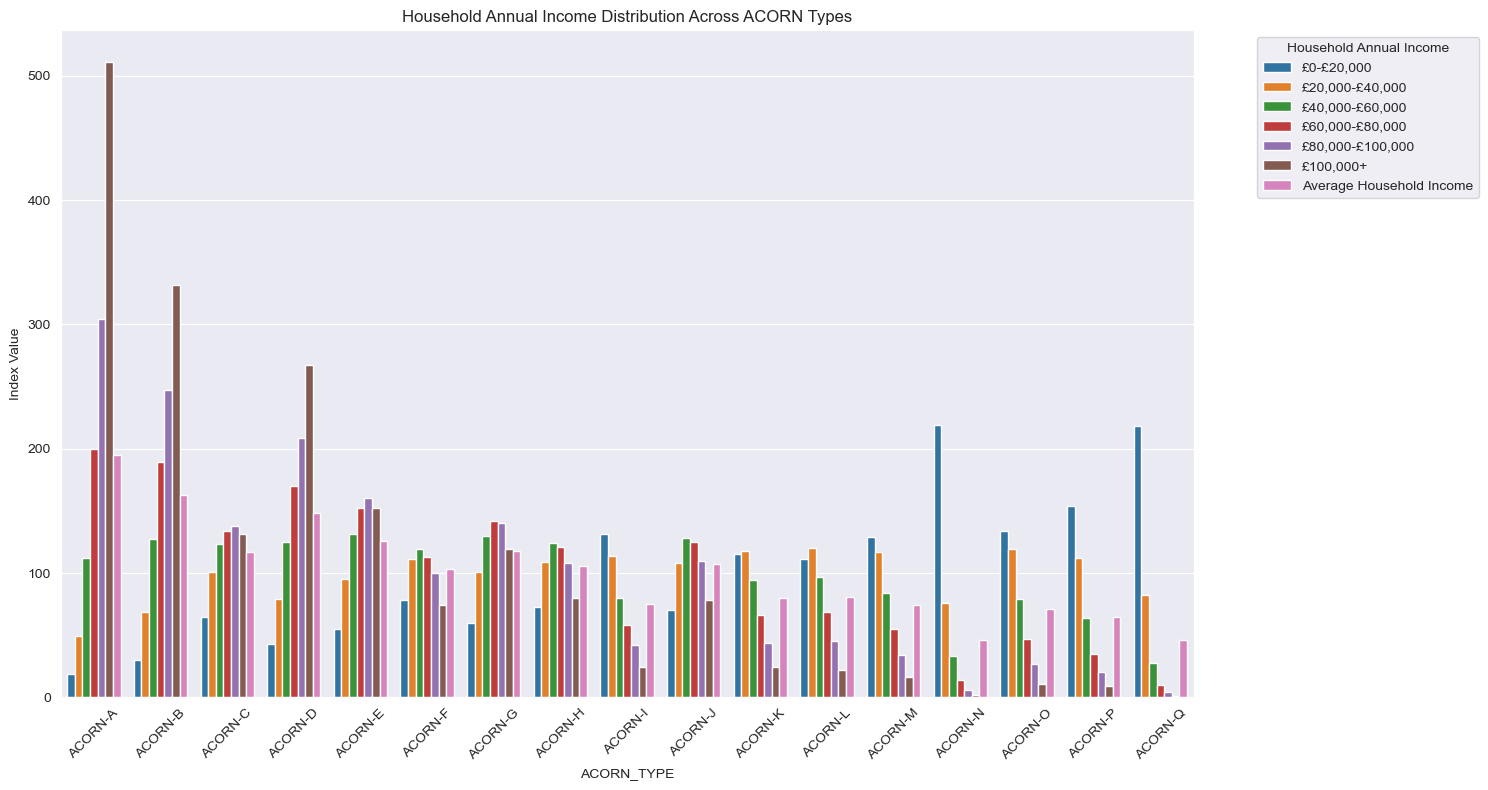

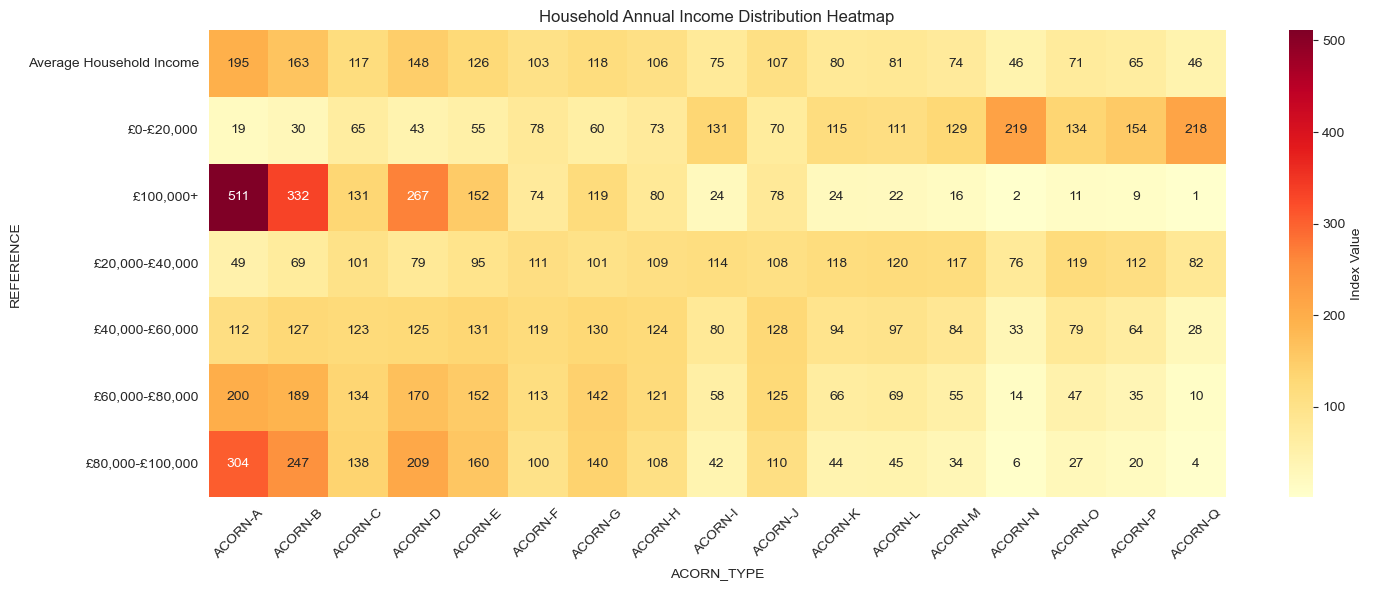

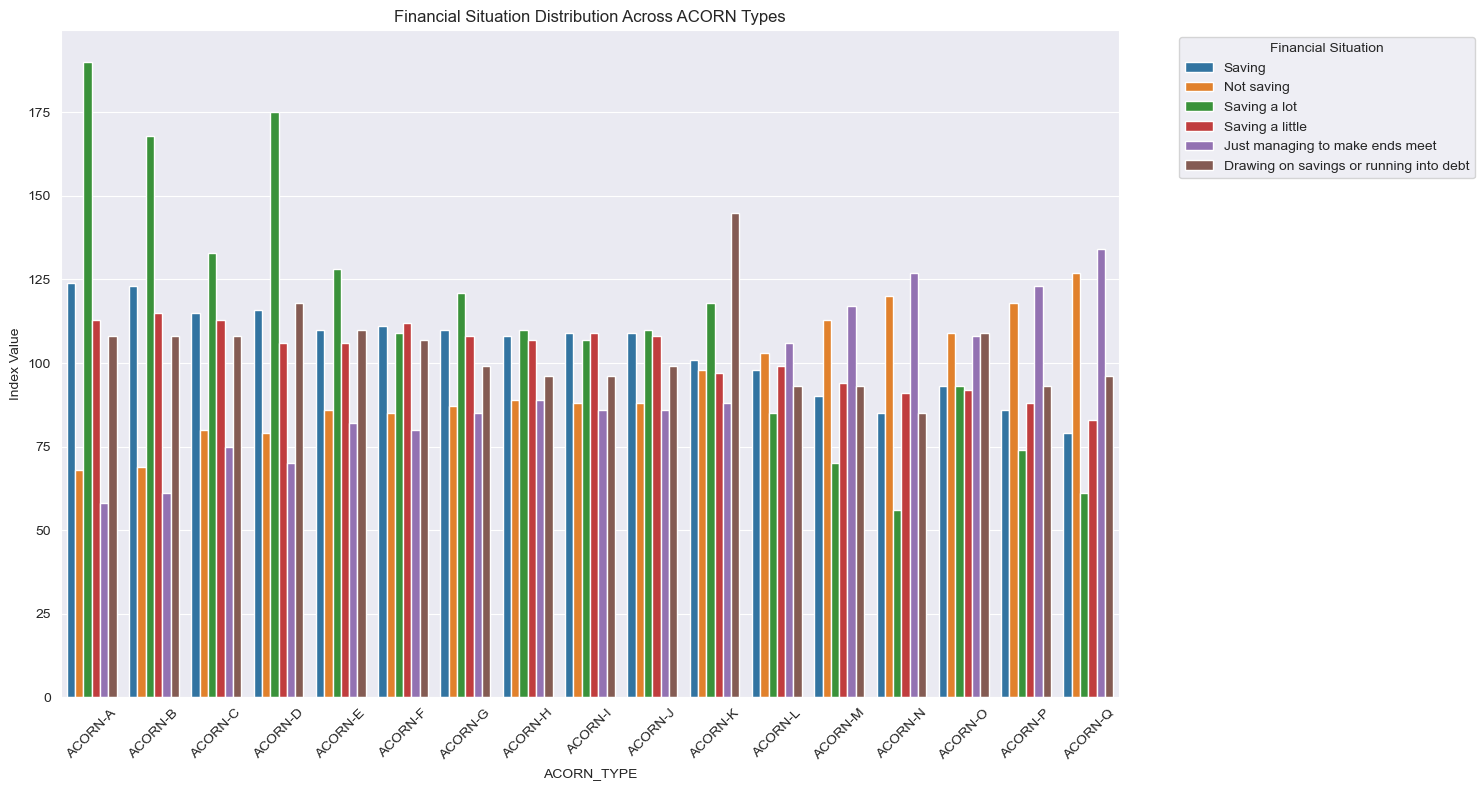

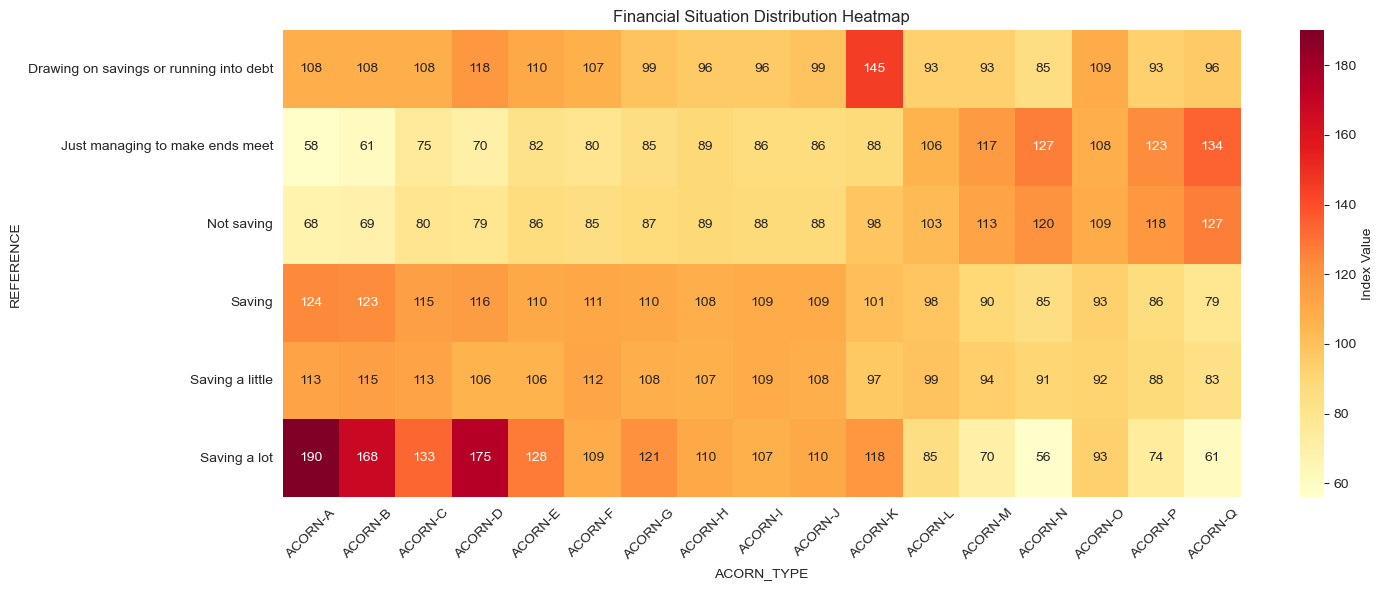

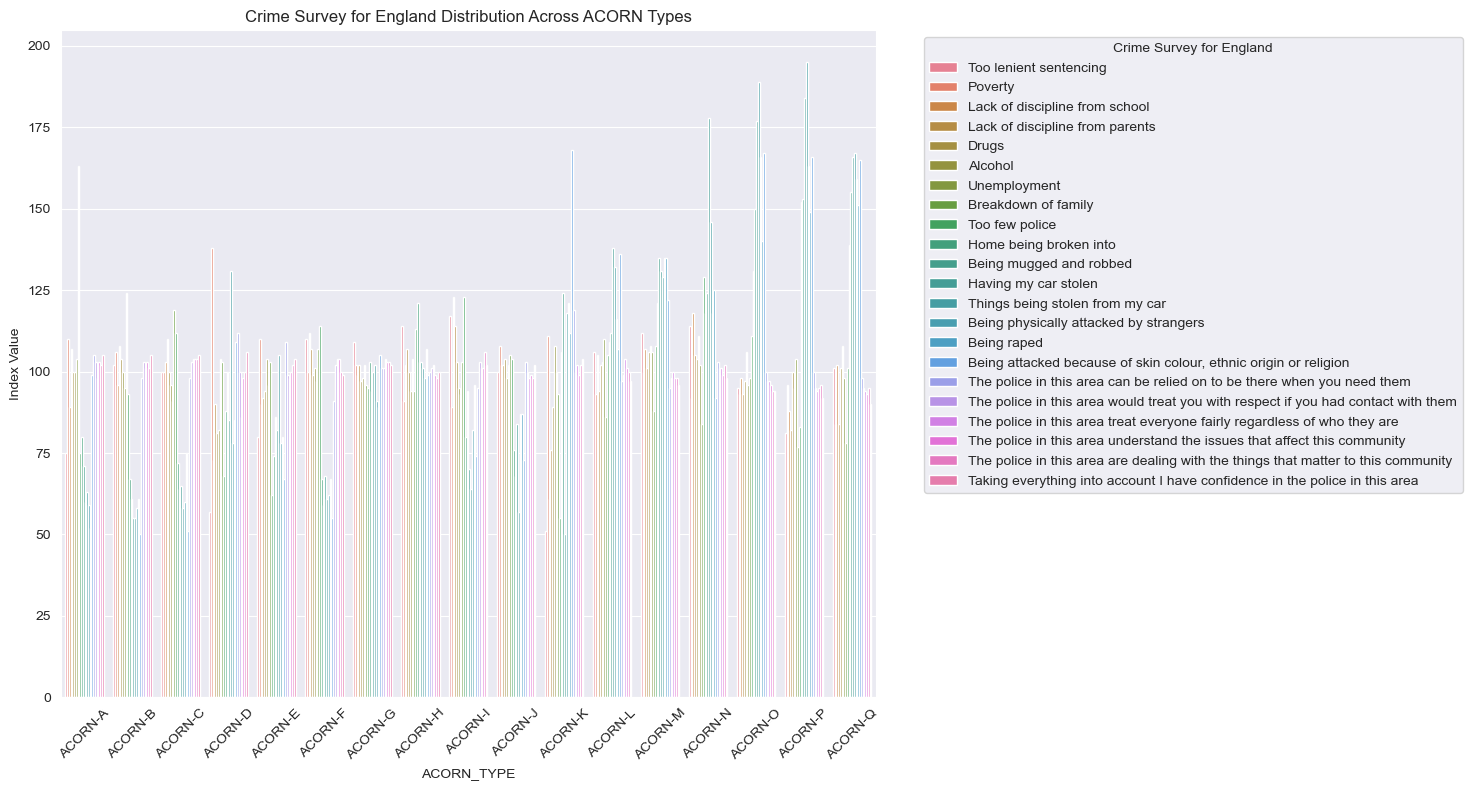

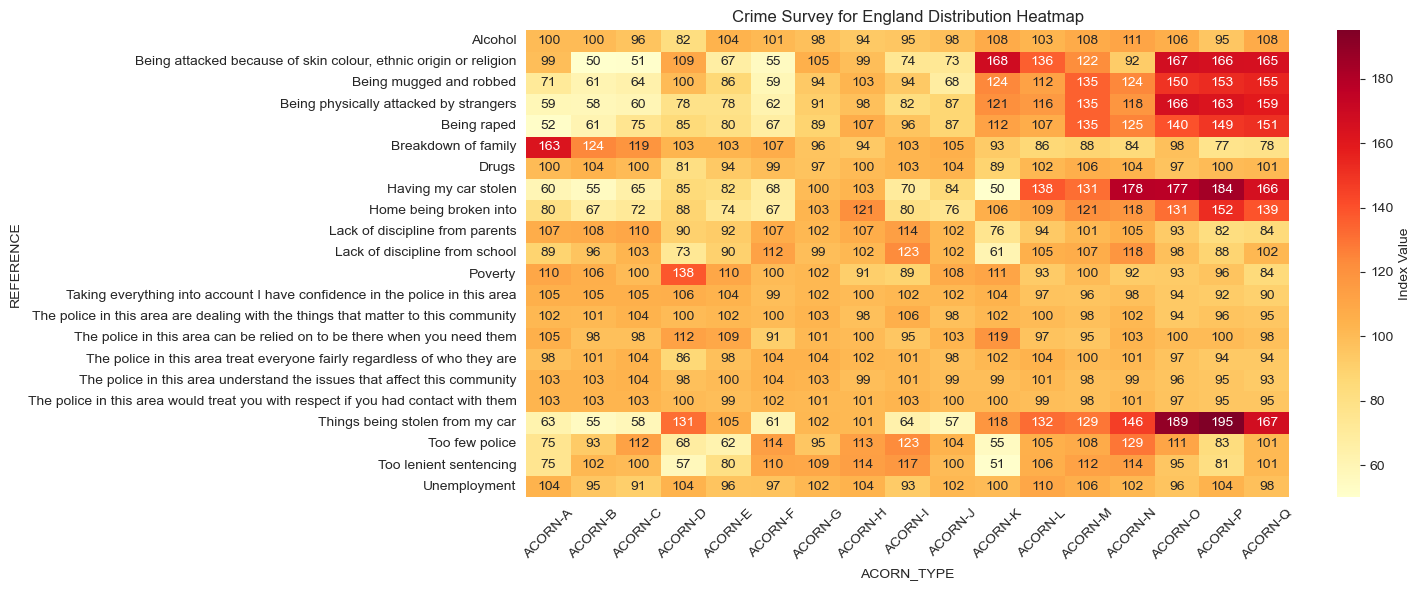

In [6]:
# plotting other features to acorn 
# I choose these features because i think they will provide an interesting result
# They did :)


categories_to_analyze = [

    'Children in household',
    'Economic Activity',
     'Social Grade',
     'Highest Level of Qualifications (Adults)',
     'Behaviours & Lifestyle',
     'Travel To Work',
     'Household Annual Income',
     'Financial Situation',
     'Crime Survey for England'
]
CatType = ['FAMILY','ECONOMY','ECONOMY','EDUCATION','HEALTH','TRANSPORT','FINANCE','FINANCE','COMMUNITY SAFETY']




# Iterate through each category
for MC, category in zip(CatType, categories_to_analyze):
    # Filter data for the current category
    category_data = df[df['MAIN CATEGORIES'] == MC][df['CATEGORIES'] == category]

    # Check if the filtered data is empty
    if category_data.empty:
        print(f"No data found for category: {category}")
        continue

    # Melt the data for plotting
    category_data = category_data.melt(id_vars=['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE'],
                                        var_name='ACORN_TYPE',
                                        value_name='VALUE')

    # Create figure for the current category
    plt.figure(figsize=(15, 8))
    sns.barplot(data=category_data, x='ACORN_TYPE', y='VALUE', hue='REFERENCE')
    plt.title(f'{category} Distribution Across ACORN Types')
    plt.xticks(rotation=45)
    plt.ylabel('Index Value')
    plt.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{category.lower().replace(" ", "_")}_distribution.png')


    # Reshape data for heatmap
    category_pivot = category_data.pivot(index='REFERENCE', columns='ACORN_TYPE', values='VALUE')

    # Check if the pivot table is empty
    if category_pivot.empty:
        print(f"No data available to create a heatmap for category: {category}")
        continue

    # Heatmap for the current category
    plt.figure(figsize=(15, 6))
    sns.heatmap(category_pivot, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Index Value'})
    plt.title(f'{category} Distribution Heatmap')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{category.lower().replace(" ", "_")}_heatmap.png')


    # Print summary statistics for the current category
    print(f"\n{category} Summary Statistics:")
    print(category_pivot.describe())
 

# ------------------------------------------------------------------------------------------------------------
# Above Analysis Result 
   
# we can see that households with low income have more children, unlock rich households.
# we can see that the majority of middle class households are students with higher education.
# we can see that mid-low and low class households are associated with bad behaviours like smoking.
# we can see that the low the acorn rating goes, the less savings the household do.
# we can see that acorn A is associated with family related crimes (breakdown of family), while the low acorn ratings are associated with sexual crimes.